In [0]:
import tensorflow as tf
from matplotlib import pyplot as plt
import tqdm

In [0]:
# training data
x_train = [1, 2, 3, 4, 5]
y_train = [0, -1, -2, -3, -4]

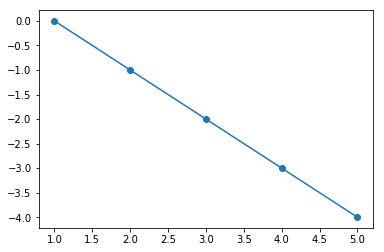

In [4]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_train)
plt.show()

## Placeholders

In [0]:
# Model input and output
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

## Trainable Variables

In [0]:
# Model parameters, 초기화 한것  -1과 0으로 되게 할 것.
W = tf.Variable([0.3], tf.float32)
b = tf.Variable([-0.3], tf.float32)

## Build a Model (y = a*x + b)

In [0]:
# RNN이든 뭐든 이부분을 수정해 주면 된다고 보면 된다.

hypothesis = x * W + b 
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))  # sum of the squares, mean-square error
# optimizer, train_operation
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) # AdamOptimizer도 대신 많이 씀.

## Train a Model (session call)

In [8]:
# training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for idx, step in enumerate(range(3000)): # 학습만 할거면 train만 찍어도 되긴 한다.
        W_val, b_val, cost_val, _ = sess.run([W, b, cost, train], {x: x_train, y: y_train})
        if idx % 200 == 0: 
          print("W: %.3f b: %.3f cost: %.3f" % (W_val, b_val, cost_val))
    # evaluate training accuracy
    W_val, b_val, cost_val = sess.run([W, b, cost], feed_dict={x: x_train, y: y_train})
    print("Final Prediction => W: %.3f b: %.3f cost: %.3f" % (W_val, b_val, cost_val))

print("Ground Truth => W: -1 b: 1")

W: 0.092 b: -0.352 cost: 10.140
W: -0.784 b: 0.219 cost: 0.112
W: -0.890 b: 0.604 cost: 0.029
W: -0.944 b: 0.799 cost: 0.007
W: -0.972 b: 0.898 cost: 0.002
W: -0.986 b: 0.948 cost: 0.000
W: -0.993 b: 0.974 cost: 0.000
W: -0.996 b: 0.987 cost: 0.000
W: -0.998 b: 0.993 cost: 0.000
W: -0.999 b: 0.997 cost: 0.000
W: -1.000 b: 0.998 cost: 0.000
W: -1.000 b: 0.999 cost: 0.000
W: -1.000 b: 1.000 cost: 0.000
W: -1.000 b: 1.000 cost: 0.000
W: -1.000 b: 1.000 cost: 0.000
Final Prediction => W: -1.000 b: 1.000 cost: 0.000
Ground Truth => W: -1 b: 1
